In [1]:
from utils.data_loader import full_data_loader
import torch
from models import ResNet, ResidualBlock
from sklearn.metrics import accuracy_score, classification_report
from utils.utils import plot_confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

sample_test_dataset_path = "./datasets/sample_test_dataset"
trained_model_path = "./trained_models/ResNet-final.pth"

/opt/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /opt/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/ml/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/ml/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/ml/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before

cpu


## Load the Trained Model

In [2]:
model = ResNet(ResidualBlock, [2, 4, 6, 3]).to(device)
model.load_state_dict(torch.load(trained_model_path,map_location=torch.device(device)))

/var/folders/c3/wjytfz2x4rdfv2bhmlsjy49w0000gn/T/ipykernel_79948/2410517605.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(trained_mode

<All keys matched successfully>

## Test the Model on the Sample Test Dataset

Accuracy of the network on the 100 test images: 95.0 %
Accuracy: 95.00%


              precision    recall  f1-score   support

         MUS       0.92      0.97      0.94        34
        NORM       0.97      0.97      0.97        33
         STR       0.97      0.91      0.94        33

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



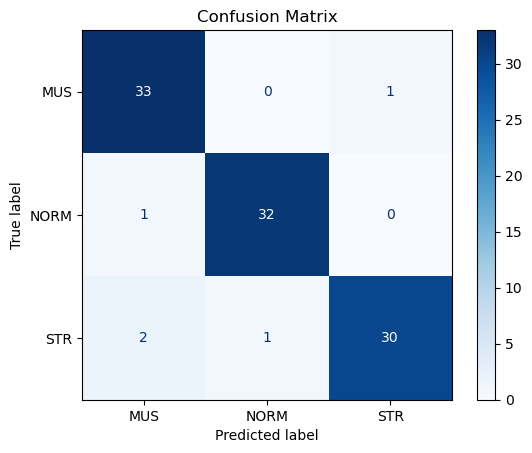

In [3]:
sample_test_loader = full_data_loader(data_path=sample_test_dataset_path, batch_size=64)

y_labels = torch.tensor([])
y_pred = torch.tensor([])

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in sample_test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        y_labels = torch.cat([y_labels, labels])
        y_pred = torch.cat([y_pred, predicted])

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(len(sample_test_loader.dataset), 100 * correct / total))

accuracy = accuracy_score(y_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n\n")

print(classification_report(y_labels, y_pred, target_names=["MUS", "NORM", "STR"]))

plot_confusion_matrix(y_labels, y_pred, "Confusion Matrix", ["MUS", "NORM", "STR"])
